In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from networks import DiffusionNetwork
from data import LatinHyperCubeSampling
from networks import BaseNetwork


In [2]:
data=np.load(r'E:\Heat_diffusion_laser\10_May_2025_19_16_10_FBH6mm_step_size_sim_step_0_002m_p1.npz',allow_pickle=True)

In [3]:
data=np.array(data['data'],dtype=np.float32)

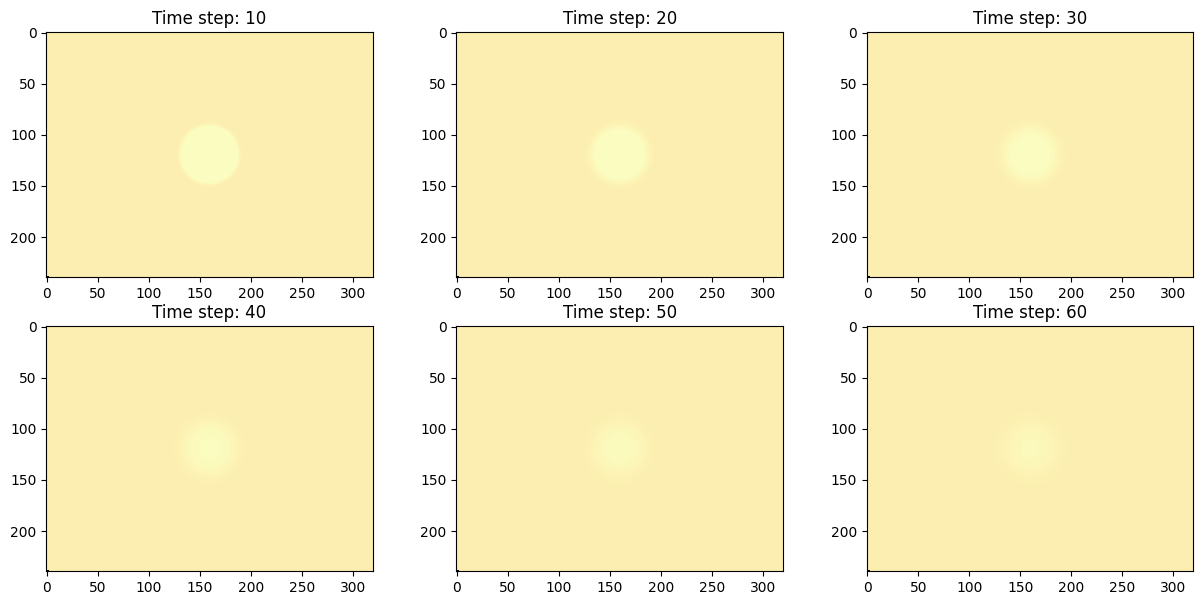

In [4]:
plt.figure(figsize=(15,7))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.title(f'Time step: {i*10+10}')
    plt.imshow(data[i*10+10,:,:],cmap='magma',vmin=10000,vmax=30000)


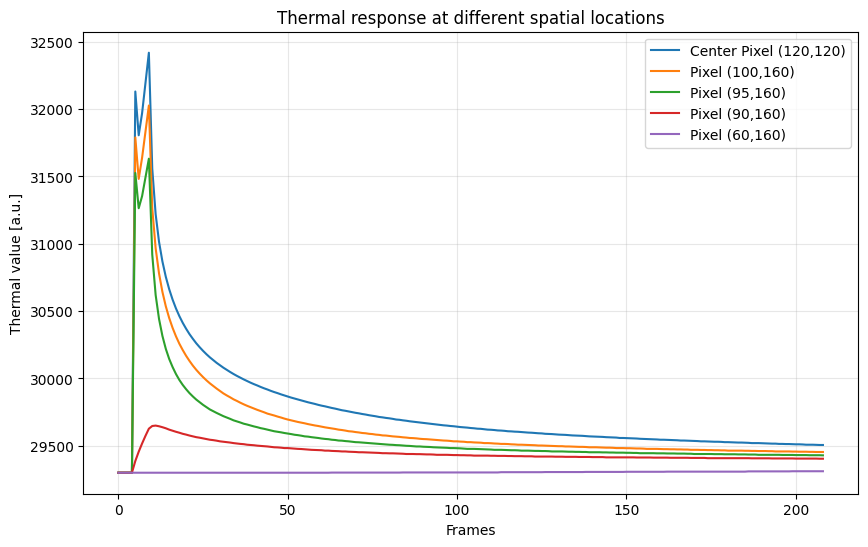

In [5]:
plt.figure(figsize=(10,6))
plt.plot(data[:,120,160],label='Center Pixel (120,120)')
plt.plot(data[:,100,160],label='Pixel (100,160)')
plt.plot(data[:,95,160],label='Pixel (95,160)')
plt.plot(data[:,90,160],label='Pixel (90,160)')
plt.plot(data[:,60,160],label='Pixel (60,160)')
plt.grid(alpha=0.3)
plt.xlabel('Frames')
plt.ylabel('Thermal value [a.u.]')
plt.title('Thermal response at different spatial locations')
plt.legend()

In [6]:
data.shape

(209, 240, 320)

In [7]:
sampler=LatinHyperCubeSampling(data.shape) # (T,H,W)
coordis=sampler.lhs_tensor_indices(100,mode='interior') # Collocation points

In [8]:
data=sampler.extract_values(data,coordis)

In [10]:
# inputs
X = torch.from_numpy(data[:, :-1].astype(np.float32))
X.requires_grad_(True)  # enable gradient tracking for PINN residuals

# targets
y = torch.from_numpy(data[:, -1].astype(np.float32))

In [14]:
X=torch.rand((10,3),requires_grad=True)
X.size()

y=torch.rand(10).view(-1,1)
y.size()

torch.Size([10, 1])

In [9]:
model=BaseNetwork(input_size=3,output_size=1,hidden_layers=2,hidden_units=50)

In [10]:
result=model(X)

In [11]:
result.size()

torch.Size([10, 1])

In [13]:
grad_u = torch.autograd.grad(
    outputs=result,
    inputs=X,
    grad_outputs=torch.ones_like(result),
    create_graph=True
)[0]

RuntimeError: One of the differentiated Tensors does not require grad

In [12]:
grad_u[:, 0]

NameError: name 'grad_u' is not defined

In [ ]:
grad2_u_x = torch.autograd.grad(
    outputs=grad_u[:, 0],      # derivative w.r.t x (or t)
    inputs=X,
    grad_outputs=torch.ones_like(grad_u[:,0]),
    create_graph=True
)[0][:,0]  # shape [5,]